# Custom Training with YOLOv5

In this tutorial, we assemble a dataset and train a custom YOLOv5 model to recognize the objects in our dataset. To do so we will take the following steps:

https://github.com/ultralytics/yolov5

# Lable by 

https://roboflow.com/

In [ ]:
!pip install PyYAML

In [50]:
!nvidia-smi

Fri Mar  4 15:54:59 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    55W / 149W |    796MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [1]:
#clone YOLOv5 and 
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images
from yolov5 import utils
display = utils.notebook_init()  # checks

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

YOLOv5 🚀 v6.1-14-g8a66eba torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 42.3/78.2 GB disk)
Setup complete. Using torch 1.10.0+cu111 (Tesla K80)


In [52]:

from roboflow import Roboflow
rf = Roboflow(api_key="3m3CAjReHFawvohIpsB4")
project = rf.workspace("tuchsanai").project("catmonkey")
dataset = project.version(1).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to catmonkey-1 in yolov5pytorch:: 100%|██████████| 48/48 [00:00<00:00, 1298.47it/s]


In [53]:
!python train.py --img 416 --batch 16 --epochs 100 --data {dataset.location}/data.yaml --weights yolov5s.pt 

train: weights=yolov5s.pt, cfg=, data=/content/yolov5/yolov5/catmonkey-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-14-g8a66eba torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, deg

In [38]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

%matplotlib inline

file = "/content/yolov5/catmonkey-1/train/images/cats_and_monkeys_015_jpg.rf.50e2af27a5f1d10d201842bdcbcec563.jpg"

img = cv2.imread(file)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

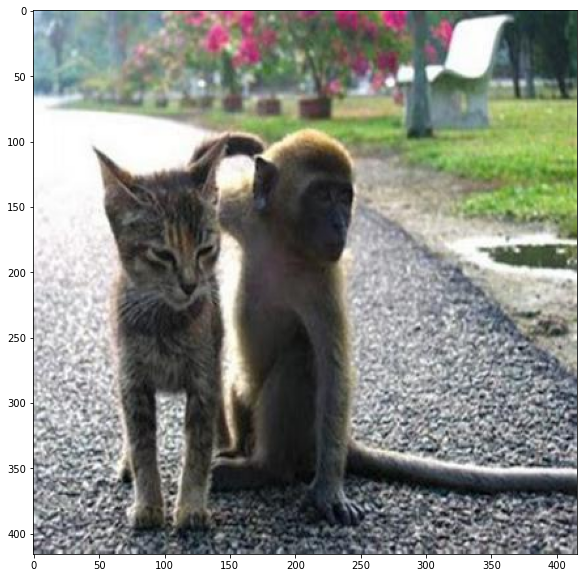

In [39]:
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

In [41]:

model = torch.hub.load('/content/yolov5', 'custom', path='/content/yolov5/runs/train/exp/weights/last.pt', source='local') 

YOLOv5 🚀 v6.1-14-g8a66eba torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 213 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [59]:
results1 = model(img, size=320)
df1 = results1.pandas().xyxy[0]

df1

,xmin,ymin,xmax,ymax,confidence,class,name
0,105.995224,67.912003,274.125061,410.041931,0.426650,1,monkey
1,36.576122,101.377182,181.577881,416.000000,0.312140,1,monkey
2,36.416691,77.577637,175.234467,416.000000,0.292074,0,cat


In [60]:
conf_thres

NameError: ignored

In [72]:
Dictdata =  results1.pandas().xyxy[0].to_dict('index')

Dictdata 




{0: {'class': 1,
  'confidence': 0.4266498386859894,
  'name': 'monkey',
  'xmax': 274.12506103515625,
  'xmin': 105.99522399902344,
  'ymax': 410.04193115234375,
  'ymin': 67.91200256347656},
 1: {'class': 1,
  'confidence': 0.31213951110839844,
  'name': 'monkey',
  'xmax': 181.577880859375,
  'xmin': 36.57612228393555,
  'ymax': 416.0,
  'ymin': 101.37718200683594},
 2: {'class': 0,
  'confidence': 0.2920742332935333,
  'name': 'cat',
  'xmax': 175.23446655273438,
  'xmin': 36.416690826416016,
  'ymax': 416.0,
  'ymin': 77.57763671875}}

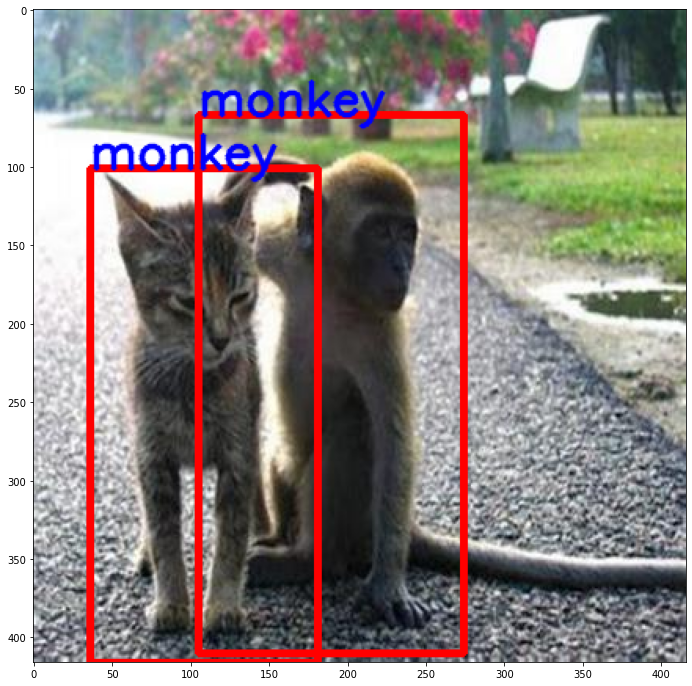

In [73]:
image = img.copy()

# Blue color in BGR
color = (255, 0, 0)
  
# Line thickness of 2 px
thickness = 3
  
cropimage = []  

for key, x in Dictdata.items():

    if x['confidence'] > 0.3 :
      start_point = ( int(x['xmin']), int(x['ymin']) )
      end_point   = ( int(x['xmax']), int(x['ymax']) )
      image = cv2.rectangle(image, start_point, end_point, color, thickness)

      text = x['name']
      image = cv2.putText(image, text, start_point, cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA, False)

     
plt.figure(figsize=(12,12))
plt.imshow(  image )